In [1]:
from deepforest import main
from deepforest import get_data
from deepforest import utilities

import os
import matplotlib.pyplot as plt
import rasterio

model = main.deepforest()
model.use_release()


Reading config file: C:\Users\GevaertCM\AppData\Local\anaconda3\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml


C:\Users\GevaertCM\AppData\Local\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\GevaertCM\AppData\Local\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [9]:
img_file = "C:/SVMA_model/Sample_image1_3bnd.tif"
root_dir = "C:/SVMA_model/"

outfile = img_file[:-4] + "_boundingboxes.shp" # name of output GIS file with boundingboxes of detected tree crowns
raster_path = get_data(img_file)

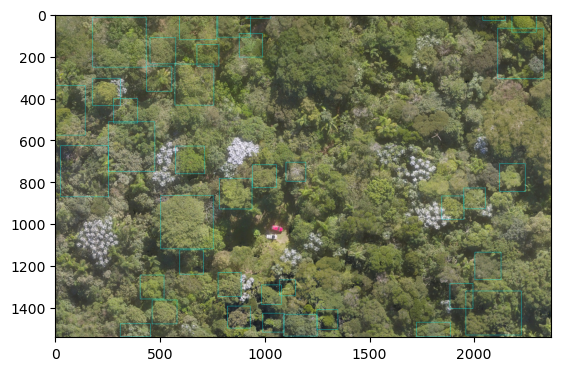

In [3]:
# option to predict on a single image
predicted_img = model.predict_image(path=img_file,return_plot=True)
plt.imshow(predicted_img[:,:,::-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:02<00:00,  1.56s/it]

1161 predictions in overlapping windows, applying non-max supression
728 predictions kept after non-max suppression


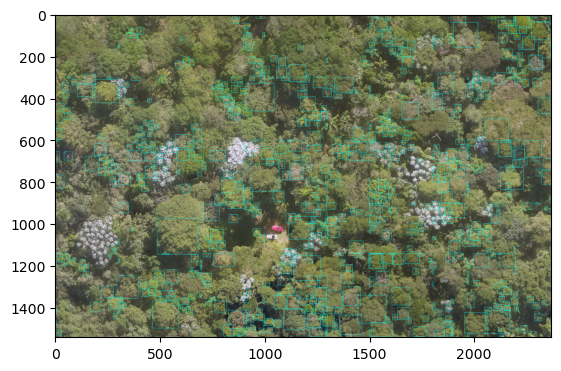

In [4]:
# option to predict on a tile, better for large study areas. the docs recommend a patch size 400-800 px
predicted_raster =  model.predict_tile(raster_path, return_plot = True, patch_size=400,patch_overlap=0.25)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(predicted_raster[:,:,::-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:22<00:00,  1.92s/it]

426 predictions in overlapping windows, applying non-max supression
225 predictions kept after non-max suppression


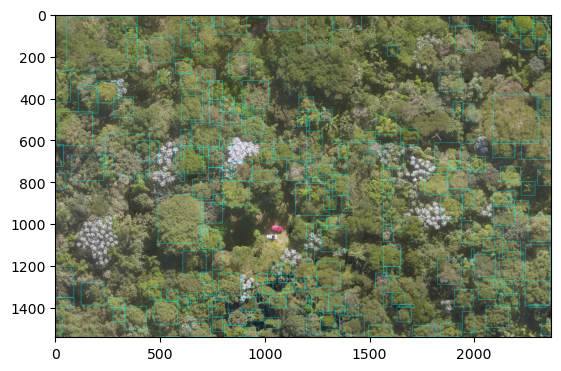

In [5]:
#img = model.predict_image(path="C:/SVMA_model/Sample_image1.tif",return_plot=True)
predicted_raster =  model.predict_tile(raster_path, return_plot = True, patch_size=800,patch_overlap=0.25)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(predicted_raster[:,:,::-1])

Results seem to work better when predicting a tall with a large window size. Option for 400 px patch_size resulted in many small tree canopies, option for larger patch_size seemed to cause less oversegmentation but still captured more than the single image prediction.

In [6]:
# Export annotations to shapefile
df = model.predict_tile(raster_path, return_plot=False, patch_size=800,patch_overlap=0.25) 

gdf = utilities.boxes_to_shapefile(df, root_dir, projected=True, flip_y_axis=False)
gdf.to_file(outfile)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:19<00:00,  1.64s/it]


426 predictions in overlapping windows, applying non-max supression
225 predictions kept after non-max suppression
